#TP 8 Mouvement circulaire uniforme

Le pointage est déjà réalisé, les données sont dans un fichier .csv, qu'il faut maintenant aller lire.

Suivre la procédure suivante
- Créer dans drive un dossier data
- Enregistrer le fichier .csv dans ce dossier
- Exécuter le code du premier bloc ci-dessous et se laisser guider. Il faut s'identifier avec son compte google puis copier le code de vérification et le coller dans la zone indiquée
- A gauche du notebook cliquer sur l'icône fichier 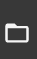. S'il n'y est pas cliquer sur l'avant dernière icône (palette de commande, puis afficher l'explorateur de fichier)
- Rechercher le dossier data et le fichier .csv
- cliquer sur les 3 petits points pour copier le chemin d'accès
- coller ce chemin dans la partie lecture du .csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importation des données du .csv
Le pointage a été réalisé avec Pyméca vidéo, Régressi ou vidanalysis, les données de $t$, $x$ et $y$ sont dans un fichier .csv

Nous allons utiliser une fonction qui permet d'extraire les données.

Il faut jeter un coup d'eil au fichier .CSV ici les varaibles sont dans l'ordre $t$, $x$ et $y$ séparées par des virgules avec un point pour la décimale.

Attention à bien choisir la fonction en lien avec l'outil utilisé pour le pointage.


In [ ]:
#lecture du fichier .csv avec pymecavideo ou regressi
#les trois arguments sont :
#fichier : nom du fichier.csv
#sep : type de séparateur
#n : numéro de la colonne à extraire
def CSV_pymeca(fichier,sep,n):
    file=open(fichier,'r')
    reader=csv.reader(file,delimiter=sep)
    col=np.array([])
    for row in reader:
        notation_point=row[n].replace(',','.')#remplace les , par des .
        col=np.append(col,notation_point)
    col=np.delete(col,0) #supprime la première valeur
    file.close()
    result=[float(i) for i in col]
    result=np.array(result)
    return result

    #lecture du fichier .csv Regressi
def CSV_regressi(fichier,sep,n):
    file=open(fichier,'r')
    reader=csv.reader(file,delimiter=sep)
    col=np.array([])
    for row in reader:
        col=np.append(col,row[n])
    col=np.delete(col,0) #supprime la première valeur
    col=np.delete(col,0) #avec pointage regressi unité à supprimer
    file.close()
    result=[float(i) for i in col]
    result=np.array(result)
    return result

#lecture du fichier .csv Vidanalysis
def CSV_vidanalysis(fichier,sep,n):
    file=open(fichier,'r')
    reader=csv.reader(file,delimiter=sep)
    col=np.array([])
    for row in reader:
        notation_point=row[n].replace(',','.')
        col=np.append(col,notation_point)
    col=np.delete(col,0) #supprime la première valeur
    file.close()
    result=[float(i) for i in col]
    result=np.array(result)
    return result

On va maintenant mettre les données dans les variables correspondantes.

In [ ]:
#nom et type de separateur
#c'est ici qu'il faut coller le chemin d'accès
nom_fichier='/content/drive/MyDrive/data/velo2_correct.csv' #remplacer velo2_correct avec le nom de votre fichier
separateur=','

#stockage des données
t=CSV_vidanalysis(nom_fichier,separateur,0)
x=CSV_vidanalysis(nom_fichier,separateur,1)
y=CSV_vidanalysis(nom_fichier,separateur,2)

Avant de continuer on vérifie que le pointage réalisé est correct et qu'il n'y a pas de problèmes en traçant la trajectoire du système.

In [ ]:
plt.figure(dpi=100)
plt.axis('equal')
plt.title('Trajectoire du système')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.plot(x, y, 'b+', label = 'Trajectoire')
plt.grid()
plt.show()

Suite du TP, on commence à la ligne 29 pour respecter le sujet

In [ ]:




























#rayon
R=np.sqrt(x**2+y**2)

#nb de valeurs dans x et y
Nx=len(x)
Ny=len(y)

#calcul des vitesse
vx=np.array([(x[i+1]-x[i-1])/(t[i+1]-t[i-1]) for i in range (1,Nx-1)])
vy=np.array([(y[i+1]-y[i-1])/(t[i+1]-t[i-1]) for i in range (1,Ny-1)])
v=np.sqrt(vx**2+vy**2)

#nb de valeurs dans vx et vy
Nvx=len(vx)
Nvy=len(vy)

#calcul de l'accélération
#ax=
#ay=
#a=


#moyennes et incertitudes types
#vitesse
vmoy=np.mean(v)
uv=np.std(v)/np.sqrt(len(v))
#acceleration
#amoy=np.mean(a)
#ua=np.std(a)/np.sqrt(len(a))
#rayon
Rmoy=np.mean(R)
uR=np.std(R)/np.sqrt(len(R))


#calcul de l'accélération théorique
#atheo=




# Creation du graphique
plt.figure(1)
#partie de gauche
plt.subplot(121)
plt.axis('equal')
plt.title('Trajectoire du système')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.plot(x, y, 'b+', label = 'Trajectoire')
#partie de droite
plt.subplot(122)
plt.axis('equal')
plt.title('Vecteurs')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.plot(x, y, 'b+', label = 'Trajectoire')
# for i in range(len(vx)) :
#   plt.quiver(x[i+1], y[i+1], vx[i], vy[i], angles = "xy", scale_units = "xy", scale = 10, color = "red")
#
# for i in range(len(ax)) :
#   plt.quiver(x[i+2], y[i+2], ax[i], ay[i], angles = "xy", scale_units = "xy", scale = 100, color = "blue")
plt.show()






